<a href="https://www.kaggle.com/code/mrsalty/milan-expats-by-neighbourhood-eda-1999-2023?scriptVersionId=170600333" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Milan expats by neighbourhood EDA (1999-2023)

Exploration of Milan expats data from City of Milan [Open Data platform](https://dati.comune.milano.it/)

![https://www.yesmilano.it/sites/default/files/styles/testata_full/public/itinerario/copertina/6298/23579/posti-da-vedere-fotografare-a-milano-di-notte.jpg?itok=wP9aMJ1Z](https://www.yesmilano.it/sites/default/files/styles/testata_full/public/itinerario/copertina/6298/23579/posti-da-vedere-fotografare-a-milano-di-notte.jpg?itok=wP9aMJ1Z)

In [1]:
# imports
import csv
import pandas as pd
import numpy as np 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb 

from matplotlib.pyplot import figure

In [2]:
# settings
import warnings
warnings.filterwarnings('ignore')
#figure(figsize=(18, 12), dpi=80)

In [3]:
df_2 = pd.read_csv('/kaggle/input/milan-expats-citizens-neighbourhoods-1999-2023/ds29_pop_sto_zona_1999_2023.csv',sep=';',on_bad_lines='skip')

# top 10 expat groups
arr_citizens_sorted_10 = (df_2[df_2.Cittadinanza!='Italia'] \
    .groupby(['Cittadinanza'])['Residenti'] \
    .sum() \
    .reset_index(name='Count') \
    .sort_values(['Count'], ascending=False) \
    .head(10))['Cittadinanza'] \
    .to_numpy()


# top 5 expat groups
arr_citizens_sorted_5 = (df_2[df_2.Cittadinanza!='Italia'] \
    .groupby(['Cittadinanza'])['Residenti'] \
    .sum() \
    .reset_index(name='Count') \
    .sort_values(['Count'], ascending=False) \
    .head(5))['Cittadinanza'] \
    .to_numpy()

In [4]:
# clean Eta
df_2.loc[df_2['Eta'] == '100 e più', 'Eta'] = 100

## Dataset analysis

Text(0.5, 0, 'Gender')

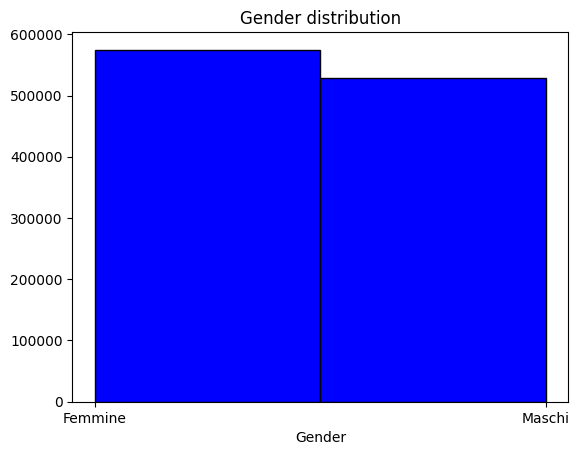

In [5]:
plt.hist(x=df_2['Genere'], color = 'blue', edgecolor = 'black', bins = 2)
plt.title('Gender distribution')
plt.xlabel("Gender")

Text(0.5, 0, 'Year')

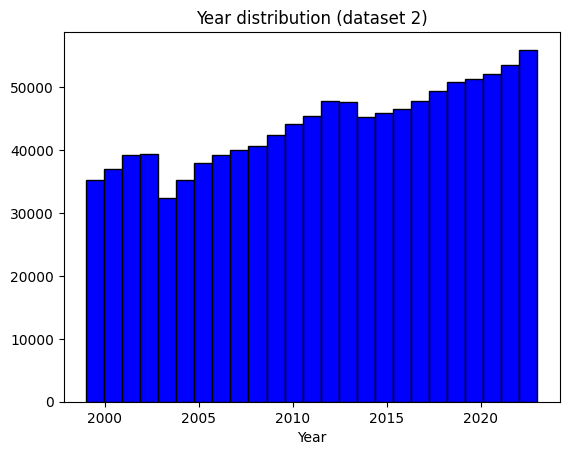

In [6]:
plt.hist(x=df_2['Anno'].astype(int), color = 'blue', edgecolor = 'black', bins = 25)
plt.title('Year distribution (dataset 2)')
plt.xlabel("Year")

Text(0.5, 0, 'Municipio (Council)')

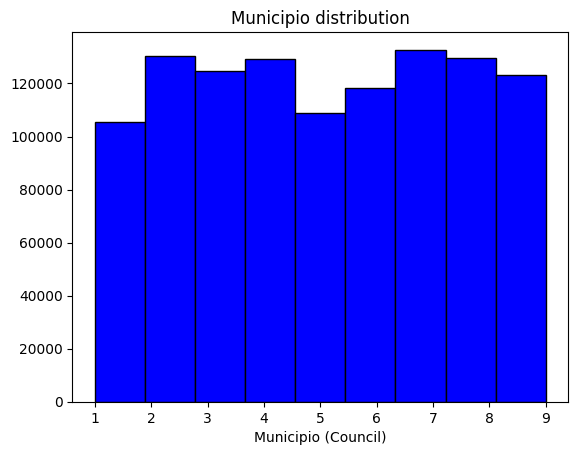

In [7]:
plt.hist(x=df_2['Municipio'].astype(int), color = 'blue', edgecolor = 'black', bins = 9)
plt.title('Municipio distribution')
plt.xlabel("Municipio (Council)")

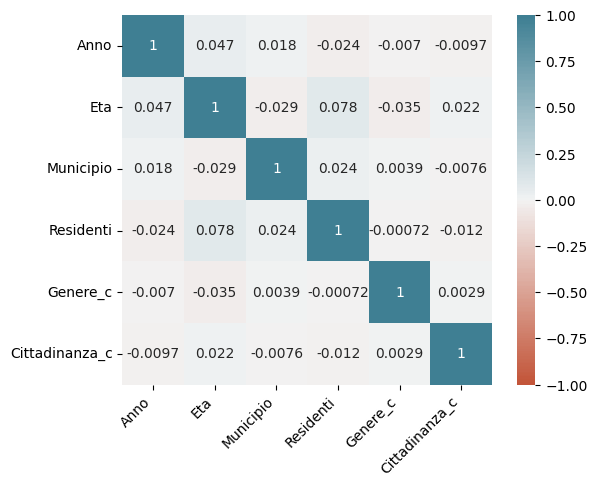

In [8]:
df_corr = df_2[['Anno','Eta','Municipio','Residenti']]
df_corr['Genere_c'] = df_2['Genere'].astype('category').cat.codes
df_corr['Cittadinanza_c'] = df_2['Cittadinanza'].astype('category').cat.codes

ax = sns.heatmap(
    df_corr.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    annot = True,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# Data analysis

In [9]:
# historical expats by country
fig = px.line(df_2[(df_2['Cittadinanza'] != 'Italia')], x="Anno", y="Residenti", color="Cittadinanza", title="Milan historical expats population data by country (1999-2023)")
fig.update_traces(mode="markers+lines")
#fig.update_traces(mode="markers+lines")
fig.show()

Text(0.5, 1.0, 'Exapts per neighborhood (All) - 2023')

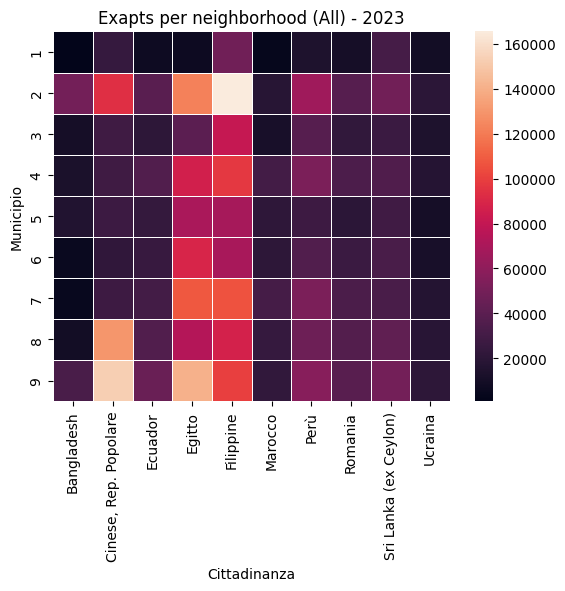

In [10]:
#all
df_2_all = df_2[df_2['Cittadinanza'].isin(arr_citizens_sorted_10)] \
    .groupby(['Cittadinanza','Municipio'])['Residenti'] \
    .sum() \
    .reset_index(name='Count') \
    .sort_values(['Count'], ascending=False)

ds_all = df_2_all.pivot(index="Municipio", columns="Cittadinanza", values="Count")
hm_all = sns.heatmap(ds_all, linewidth=.5)
hm_all.set_title('Exapts per neighborhood (All) - 2023')
#print(hm_all)

Text(0.5, 1.0, 'Exapts per neighborhood (Women) - 2023')

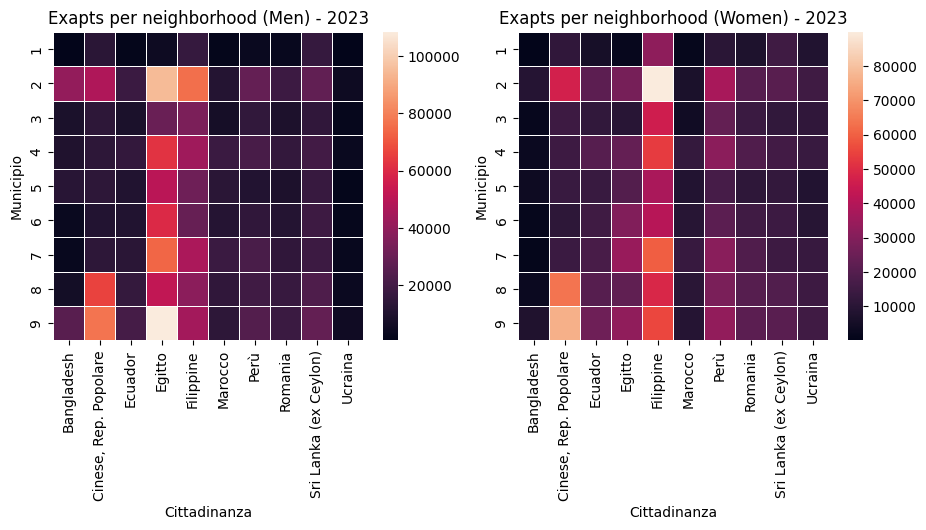

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(11,4))
#men
df_2_men = df_2[(df_2['Cittadinanza'].isin(arr_citizens_sorted_10)) & (df_2['Genere'] == 'Maschi')] \
    .groupby(['Cittadinanza','Municipio','Genere'])['Residenti'] \
    .sum() \
    .reset_index(name='Count') \
    .sort_values(['Count'], ascending=False)
ds_men = df_2_men.pivot(index="Municipio", columns="Cittadinanza", values="Count")
hm_men = sns.heatmap(ds_men, linewidth=.5, ax=ax1)
hm_men.set_title('Exapts per neighborhood (Men) - 2023')

#women
df_2_women = df_2[(df_2['Cittadinanza'].isin(arr_citizens_sorted_10)) & (df_2['Genere'] == 'Femmine')] \
    .groupby(['Cittadinanza','Municipio','Genere'])['Residenti'] \
    .sum() \
    .reset_index(name='Count') \
    .sort_values(['Count'], ascending=False)
ds_women = df_2_women.pivot(index="Municipio", columns="Cittadinanza", values="Count")
hm_women = sns.heatmap(ds_women, linewidth=.5, ax=ax2)
hm_women.set_title('Exapts per neighborhood (Women) - 2023')
#print(hm_men)

Text(0.5, 1.0, 'Expats by age')

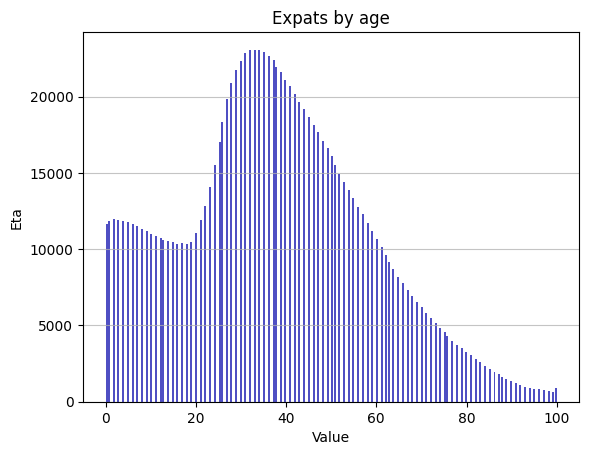

In [12]:
bins = [0, 10, 20, 40, 60, 100]

df_2['Eta_binned'] = pd.cut(df_2['Eta'].astype(int), bins)

n, bins, patches = plt.hist(x=df_2['Eta'].astype(int), bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Eta')
plt.title('Expats by age')

Text(0.5, 1.0, 'Exapts age by country (2023)')

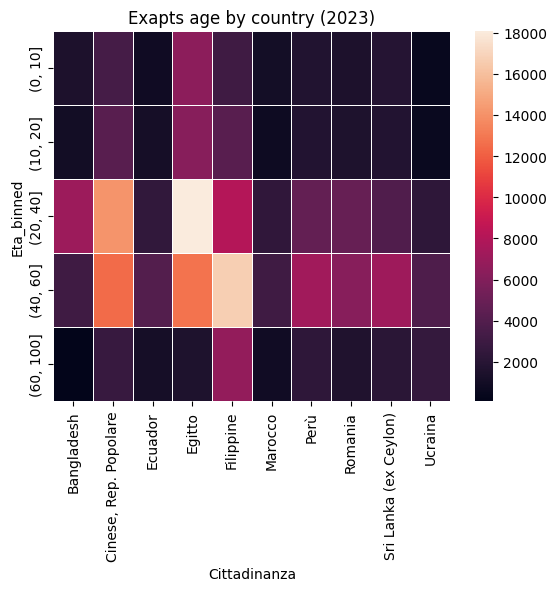

In [13]:
df_2_age = df_2[(df_2['Cittadinanza'].isin(arr_citizens_sorted_10)) & (df_2['Anno']==2023)] \
    .groupby(['Cittadinanza','Eta_binned'])['Residenti'] \
    .sum() \
    .reset_index(name='Count') \
    .sort_values(['Count'], ascending=False)

ds_all = df_2_age.pivot(index="Eta_binned", columns="Cittadinanza", values="Count")
hm_all = sns.heatmap(ds_all, linewidth=.5)
hm_all.set_title('Exapts age by country (2023)')

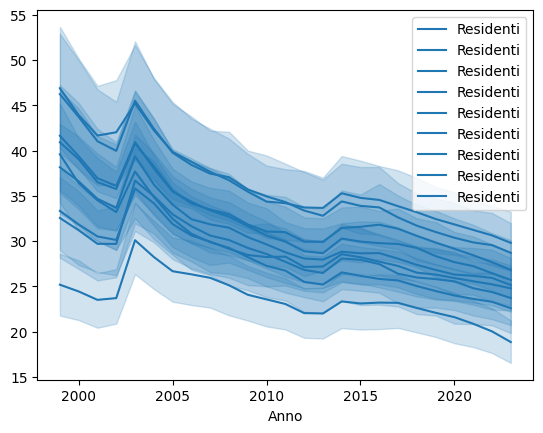

In [14]:
# for i in arr_citizens_sorted_10:
#     df_lineplot = df_2[(df_2['Cittadinanza'] == i)][['Anno','Residenti']]
#     df_lineplot.index = df_lineplot['Anno']
#     del df_lineplot['Anno']
#     lp = sns.lineplot(df_lineplot)
#     title = f'Residenti {i}'
#     print(title)
#     lp.set_title(title)

plt.figure()
for m in range(1,10):
    df_lineplot = df_2[(df_2['Municipio'] == m)][['Anno','Residenti']]
    df_lineplot.index = df_lineplot['Anno']
    del df_lineplot['Anno']
    lp = sns.lineplot(df_lineplot)
    #title = f'Municipio {m}'
    #lp.set_title(title)
plt.show()